# Esercizio 1
Esaminiamo il dataset: 
- quanti dati ci sono in totale? 
- quali sono i metadati? 
- stampiamo il primo elemento 
- stampiamo l'ultimo elemento 
- riusciamo a stampare un elemento a caso? 
- quali sono gli anni di inserimento presenti? 
- quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46? 
- quante attività ci sono nella provincia di Vicenza? 
- quante enoteche ci sono, e come si chiamano? 3 
- quante attività ci sono in Lazio e Abruzzo assieme?

In [103]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

cmi_df = pd.read_csv('club_map_italy.csv', encoding="latin1", sep=";")

print("Dimensione del dataset:", cmi_df.shape)
print("\nNomi delle colonne (metadati):", cmi_df.columns.values, sep="\n")

Dimensione del dataset: (2635, 9)

Nomi delle colonne (metadati):
['Comune' 'Provincia' 'Regione' 'Nome' 'Anno inserimento'
 'Data e ora inserimento' 'Identificatore in OpenStreetMap' 'Longitudine'
 'Latitudine']


In [20]:
print("\nPrimo elemento:")
display(cmi_df.head(1))

print("Ultimo elemento:")
display(cmi_df.tail(1))

print("Elemento casuale:")
display(cmi_df.sample(1))


Primo elemento:


,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
0,ALTRO,ALTRO,ALTRO,NaN,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.57583


Ultimo elemento:


,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
2634,TRANI,BARLETTA-ANDRIA-TRANI,Puglia,Well's Fargo,2009,2009-08-10T12:44:03Z,387223648,16.436765,41.267264


Elemento casuale:


,Comune,Provincia,Regione,Nome,Anno inserimento,Data e ora inserimento,Identificatore in OpenStreetMap,Longitudine,Latitudine
1616,LUCCA,LUCCA,Toscana,Paris Boheme,2015,2015-11-02T13:55:09Z,2993639017,10.501172,43.843108


In [68]:
cmi_df = cmi_df.rename( columns = {"Anno inserimento": "AnnoInserimento"} )
print("Anni di inserimento presenti:", cmi_df.AnnoInserimento.nunique())

Anni di inserimento presenti: 10


In [32]:
lon_filter = cmi_df['Longitudine'].between(9, 10, inclusive = 'both')
lat_filter = cmi_df['Latitudine'].between(45, 46, inclusive = 'both')
print("Attività nel quadrato long: 9-10; lat: 45-46: ", len(cmi_df[ lon_filter & lat_filter ]))

Attività nel quadrato long: 9-10; lat: 45-46:  306


In [33]:
print("Attività nella provicina di Vicenza:", len(cmi_df[ cmi_df["Provincia"] == "VICENZA" ]))

Attività nella provicina di Vicenza: 73


In [55]:
cmi_df['Nome'] = cmi_df['Nome'].astype('string')
eno_filter = cmi_df["Nome"].str.contains("Enoteca")
print("Enoteche totali:", len(cmi_df[ eno_filter ]))
display(cmi_df[ eno_filter ].Nome)

Enoteche totali: 6


64      Enoteca con Cucina""Tirolin""
496                 Concordia Enoteca
1003                  Enoteca Umberto
1491          Enoteca ""Al Brindisi""
1492           Enoteca ""da Massimo""
1723         Enoteca Il Violino Rosso
Name: Nome, dtype: string

In [60]:
print("Attività nel Lazio e Abruzzo:", len(cmi_df[ (cmi_df["Regione"] == "Lazio") | (cmi_df["Regione"] == "Abruzzo") ]))

Attività nel Lazio e Abruzzo: 337


# Esercizio 2
Il dataset insurance.csv dei beginner_datasets contiene dati su caratteristiche e abitudini delle persone rispetto ai costi individuali per le cure mediche come premio per le assicurazioni sulla salute. 
- Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna;
- Quali sono le medie di charges rispetto a region? Ci sono differenze significative?
- E rispetto a smoker? E a sex?
- Quali sono i descrittori statistici di bmi? Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi?

Nota: è lo stesso esercizio della volta scorsa, ma stavolta da eseguire con il metodo .groupby()

In [70]:
insurance_df = pd.read_csv('insurance.csv')

print("Dimensione del dataset:", insurance_df.shape)
print("5 righe a caso:")
display(insurance_df.sample(5))

Dimensione del dataset: (1338, 7)
5 righe a caso:


,age,sex,bmi,children,smoker,region,charges
781,18,male,41.14,0,no,southeast,1146.79660
100,41,female,31.60,0,no,southwest,6186.12700
893,47,male,38.94,2,yes,southeast,44202.65360
201,48,female,32.23,1,no,southeast,8871.15170
739,29,male,35.50,2,yes,southwest,44585.45587


In [80]:
print("Media per ", insurance_df.groupby("region")["charges"].mean(), sep='')

Media per region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


In [79]:
print("Media per ", insurance_df.groupby("smoker")["charges"].mean(), sep='')

Media per smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [78]:
print("Media per ", insurance_df.groupby("sex")["charges"].mean(), sep='')

Media per sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


In [81]:
print("Statistica descrittiva di 'bmi':")
print(insurance_df['bmi'].describe())

Statistica descrittiva di 'bmi':
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


In [106]:
insurance_df['bmi_quartile'] = pd.qcut(insurance_df['bmi'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

print('Minimo, massimo e media di charges rispetto al quartile di bmi:')
display(insurance_df.groupby('bmi_quartile')['charges'].agg(['min', 'max', 'mean']))

Minimo, massimo e media di charges rispetto al quartile di bmi:


,min,max,mean
bmi_quartile,,,
Q1,1121.8739,38245.59327,10360.662825
Q2,1131.5066,62592.87309,11407.831468
Q3,1135.9407,60021.39897,14358.173081
Q4,1141.4451,63770.42801,16987.936691


In [82]:
for i in range(1, 4):
    charges_quart = insurance_df[ insurance_df['bmi'] <= insurance_df['bmi'].quantile( i/4.0 ) ]['charges']
    print(f"Quartile {i/4.0}: \tmin={charges_quart.min()}\tmax={charges_quart.max()}\t  mean={charges_quart.mean()}")

Quartile 0.25: 	min=1121.8739	max=38245.59327	  mean=10360.662825492538
Quartile 0.5: 	min=1121.8739	max=62592.87309	  mean=10886.581103445766
Quartile 0.75: 	min=1121.8739	max=62592.87309	  mean=12028.77985970987


# Esercizio 3
Carichiamo in un DataFrame il dataset iris.csv dei beginner_datasets e calcoliamo: 
- La media della lunghezza dei petali di tutto il dataset
- La media della lunghezza dei petali per ogni specie di Iris, utilizzando il metodo .groupby()
- Media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()

In [140]:
iris_df = pd.read_csv('iris.csv')
print(iris_df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [139]:
print(f"Lunghezza media dei petali: {iris_df['petal_length'].agg('mean'):.3f}\n")
print("Lunghezza media dei petali per ", iris_df.groupby('species')['petal_length'].agg('mean'), sep='')

Lunghezza media dei petali: 3.758

Lunghezza media dei petali per species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64


In [136]:
print("Lunghezza media, minima e massima dei seoali per species:")
iris_df.groupby('species')['sepal_length'].agg(['mean', 'min', 'max'])

Lunghezza media, minima e massima dei seoali per species:


,mean,min,max
species,,,
setosa,5.006,4.3,5.8
versicolor,5.936,4.9,7.0
virginica,6.588,4.9,7.9


# Esercizio 4
Nei beginner_datasets, il dataset wine.csv contiene delle analisi organolettiche su diverse qualità di vini: 
- Qual è la media di concentrazione alcolica per ogni qualità? Ci sono differenze? E rispetto alla media totale?
- C'è differenza nella concentrazione alcolica per vini bianchi e vini rossi?
- Rifacendo le analisi dei due punti precedenti ma per il pH, cambia qualcosa?
- E per i solfati?

In [137]:
wine_df = pd.read_csv('wine.csv')
print(wine_df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')


In [157]:
wine_alcohol_mean = wine_df['alcohol'].mean()
wine_alcohol_mean_quality = wine_df.groupby('quality')['alcohol'].mean()

print('Media di concentrazione alcolica totale:', wine_alcohol_mean)
print('Media di concentrazione alcolica per', wine_alcohol_mean_quality)

Media di concentrazione alcolica totale: 10.491800831149453
Media di concentrazione alcolica per quality
3    10.215000
4    10.180093
5     9.837783
6    10.587553
7    11.386006
8    11.678756
9    12.180000
Name: alcohol, dtype: float64


In [159]:
print('Differenze rispetto alla media', abs(wine_alcohol_mean_quality - wine_alcohol_mean))

Differenze rispetto alla media quality
3    0.276801
4    0.311708
5    0.654018
6    0.095752
7    0.894205
8    1.186956
9    1.688199
Name: alcohol, dtype: float64


In [176]:
print("Differenza conc. alcolica per tipo di vino:\n", wine_df.groupby('type')['alcohol'].mean())

Differenza conc. alcolica per tipo di vino:
 type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64


In [180]:
wine_ph_mean = wine_df['pH'].mean()
wine_ph_mean_quality = wine_df.groupby('quality')['pH'].mean()

print('Media del pH totale:', wine_ph_mean)
print('Media del pH per', wine_ph_mean_quality)
print("\nDifferenza pH per tipo di vino:\n", wine_df.groupby('type')['pH'].mean())

Media del pH totale: 3.2185008465445586
Media del pH per quality
3    3.257667
4    3.231620
5    3.212189
6    3.217726
7    3.228072
8    3.223212
9    3.308000
Name: pH, dtype: float64

Differenza pH per tipo di vino:
 type
red      3.311113
white    3.188267
Name: pH, dtype: float64


In [181]:
wine_sulphates_mean = wine_df['sulphates'].mean()
wine_sulphates_mean_quality = wine_df.groupby('quality')['sulphates'].mean()

print('Media del pH totale:', wine_sulphates_mean)
print('Media del pH per', wine_sulphates_mean_quality)
print("\nDifferenza pH per tipo di vino:\n", wine_df.groupby('type')['sulphates'].mean())

Media del pH totale: 0.5312682776666154
Media del pH per quality
3    0.506333
4    0.505648
5    0.526403
6    0.532549
7    0.547025
8    0.512487
9    0.466000
Name: sulphates, dtype: float64

Differenza pH per tipo di vino:
 type
red      0.658149
white    0.489847
Name: sulphates, dtype: float64


# Esercizio 5
Nei beginner_datasets, il file boston.csv contiene il Boston Housing Dataset, che deriva dalle informazioni raccolte dal Census Service degli Stati Uniti sulle abitazioni nell'area di Boston. Di seguito vengono descritte le colonne del dataset: 
- CRIM -tasso di criminalità pro capite per città
- ZN - proporzione di terreni residenziali suddivisi in zone per lotti superiori a 25.000 piedi quadrati.
- INDUS - percentuale di acri di attività commerciali non al dettaglio per città.
- CHAS -variabile dummy del fiume Charles (1 se il tratto costeggia il fiume; 0 altrimenti)
- NOX -concentrazione di ossidi di azoto (parti per 10 milioni).
- RM -numero medio di stanze per abitazione
- AGE -proporzione di unità abitative occupate da proprietari costruite prima del 1940
- DIS - distanze ponderate da cinque centri occupazionali di Boston
- RAD -indice di accessibilità alle autostrade radiali
- TAX -aliquota dell'imposta fondiaria sul valore pieno per 10.000 dollari
- PTRATIO - rapporto alunni-insegnanti per città
- BLACK -la percentuale di neri per città
- LSTAT - % di popolazione di condizione più bassa 8
- MEDV -Valore mediano delle case, espresso in migliaia di dollari

ToDo
- La media del prezzo delle case cambia a seconda della distanza dal fiume Charles?
- Si nota una correlazione tra il tasso di criminalità e il valore delle abitazioni? Come si può spiegare il risultato?
- Qual è la media del numero di stanze rispetto al rapporto alunni-insegnanti? E del valore delle case? Appare esserci una qualche correlazione? Come si può spiegare il risultato?
- Rispetto all'accessibilità alle autostrade, cambia qualcosa la media delle età delle abitazioni? E del numero di stanze? E delle tasse?

In [187]:
boston_df = pd.read_csv('boston.csv')

print('Prezzo medio delle case a seconda della distanza dal fiume Charles:')
print(boston_df.groupby('chas')['medv'].mean())

Prezzo medio delle case a seconda della distanza dal fiume Charles:
chas
0    22.093843
1    28.440000
Name: medv, dtype: float64


,crim,medv
crim,1.000000,-0.388305
medv,-0.388305,1.000000


Il tasso di criminalità e il prezzo medio delle case presentano una buona correlazione negativa.
Al diminuire del prezzo medio aumenta il tasso di criminalità.


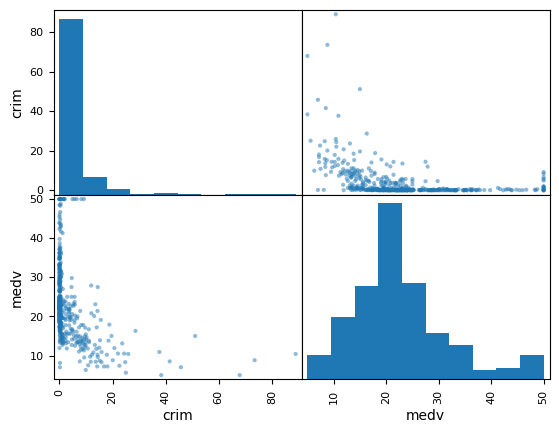

In [269]:
from pandas.plotting import scatter_matrix

display(boston_df[['crim', 'medv']].corr())

_ = scatter_matrix(boston_df[['crim', 'medv']])
print("Il tasso di criminalità e il prezzo medio delle case presentano una buona correlazione negativa.")
print("Al diminuire del prezzo medio aumenta il tasso di criminalità.")

In [ ]:
print('Media del numero di stanze rispetto al rapporto alunni-insegnanti:')
boston_df.groupby('ptratio')['rm'].mean()

In [232]:
print('Media del numero di stanze rispetto al valore delle case:')
boston_df.groupby('medv')['rm'].mean()

Media del numero di stanze rispetto al valore delle case:


medv
5.0     5.5680
5.6     5.9870
6.3     5.8520
7.0     4.9665
7.2     6.0180
         ...  
46.7    7.6860
48.3    8.2470
48.5    7.8530
48.8    8.3980
50.0    7.4840
Name: rm, Length: 229, dtype: float64

Correlazione tra numero di stanze e valore delle case:


,medv,rm
medv,1.000000,0.851417
rm,0.851417,1.000000


La correlazione è positiva, all'aumentare del valore medio delle case aumenta il numero di stanze.


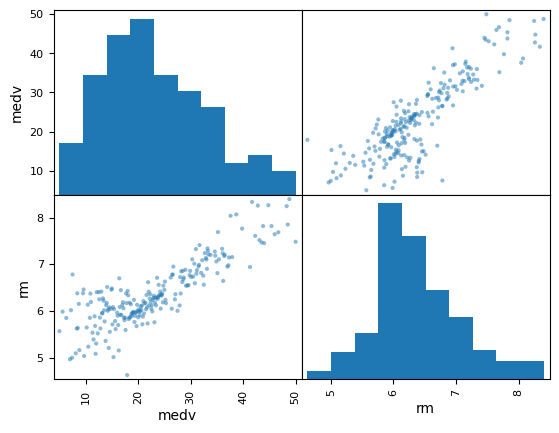

In [252]:
print('Correlazione tra numero di stanze e valore delle case:')
boston_df_medv_rm = pd.DataFrame(boston_df.groupby(['medv'])['rm'].mean()).reset_index()

display(boston_df_medv_rm.corr())

_ = scatter_matrix(boston_df_medv_rm)
print("La correlazione è positiva, all'aumentare del valore medio delle case aumenta il numero di stanze.")

Media del numero di stanze rispetto al valore delle case:


,rad,rm,age,tax
rad,1.000000,-0.423482,0.734473,0.945597
rm,-0.423482,1.000000,-0.401568,-0.642402
age,0.734473,-0.401568,1.000000,0.755919
tax,0.945597,-0.642402,0.755919,1.000000


,rad,rm,age,tax
0,1,6.555850,45.025000,291.450000
1,2,6.649958,64.770833,260.666667
2,3,6.473026,49.310526,246.078947
3,4,6.133118,60.841818,335.981818
4,5,6.393157,69.223478,331.843478
5,6,6.104731,60.142308,372.884615
6,7,6.647765,40.141176,304.411765
7,8,6.950792,67.350000,301.250000
8,24,6.022152,89.805303,666.000000


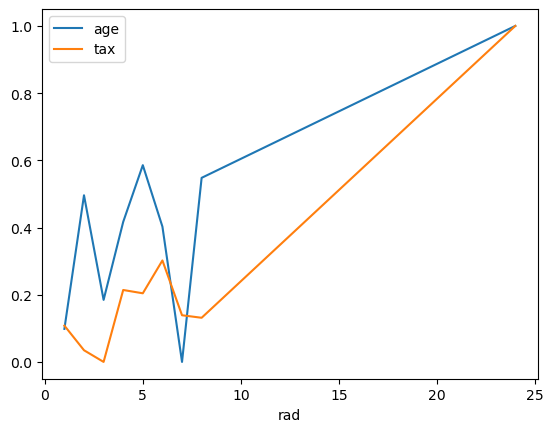

In [288]:
import matplotlib.pyplot as plt
print('Media del numero di stanze rispetto al valore delle case:')
boston_df_rad_stats = pd.DataFrame(boston_df.groupby(['rad'])[['rm', 'age', 'tax']].mean()).reset_index()

display(boston_df_rad_stats.corr())

display(boston_df_rad_stats)

boston_df_rad_stats_norm = (boston_df_rad_stats[['age', 'tax']] - boston_df_rad_stats[['age', 'tax']].min()) / (boston_df_rad_stats[['age', 'tax']].max() - boston_df_rad_stats[['age', 'tax']].min())
boston_df_rad_stats_norm['rad'] = boston_df_rad_stats['rad']
boston_df_rad_stats_norm.plot(x='rad', y=['age', 'tax'])
plt.show()

# Esercizio 6
Abbiamo un DataFrame di dipendenti: 
- employees_df = pd.DataFrame({ 'employee_id': [101, 102, 103, 104, 105], 'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'], 'department_id': [1, 2, 1, 2, 3] })
- departments_df = pd.DataFrame({ 'department_id': [1, 2, 3], 'department_name': ['HR', 'IT', 'Finance'], 'location': ['New York', 'San Francisco', 'Chicago'] })

ToDo
- Unire questi DataFrame in base alla colonna comune department_id, in modo da avere nel risultato informazioni sia sui dipendenti che sui dipartimenti, usando la funzione .merge() 
- Per ogni DataFrame, trasformare la colonna department_id nell'indice, facendo in modo che la modifica sia permanente; poi unire i due dataset mediante il metodo .join() 
- Ci sono differenze nel risultato? Quali? Perché?

In [317]:
employees_df = pd.DataFrame({ 'employee_id': [101, 102, 103, 104, 105], 'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'], 'department_id': [1, 2, 1, 2, 3] })
departments_df = pd.DataFrame({ 'department_id': [1, 2, 3], 'department_name': ['HR', 'IT', 'Finance'], 'location': ['New York', 'San Francisco', 'Chicago'] })

pd.merge(left = employees_df, right = departments_df, how = 'left', on = 'department_id')

,employee_id,name,department_id,department_name,location
0,101,Alice,1,HR,New York
1,102,Bob,2,IT,San Francisco
2,103,Charlie,1,HR,New York
3,104,David,2,IT,San Francisco
4,105,Emma,3,Finance,Chicago


In [321]:
departments_df = departments_df.set_index('department_id')
employees_df = employees_df.set_index('department_id')

employees_df.join(departments_df)

,employee_id,name,department_name,location
department_id,,,,
1,101,Alice,HR,New York
2,102,Bob,IT,San Francisco
1,103,Charlie,HR,New York
2,104,David,IT,San Francisco
3,105,Emma,Finance,Chicago


# Esercizio 7
- Dal database AdventureWorksDW importiamo le tabelle dimemployee e dimemployeesalesterritory come DataFrame
- Effettuiamo un join tra i due DataFrame usando le colonne EmployeeKey
- Controlliamo la dimensione del DataFrame risultante: è quella attesa?
- Importiamo ora la tabella dimsalesterritory ed effettuiamo un join tra questa e il DataFrame risultante della join precedente, usando le colonne SalesTerritoryKey
- Su questo DataFrame contare quanti dipendenti ci sono per ogni paese (country) e per ogni regione (region)
- Valutiamo la media del BaseRate per ogni paese: ci sono differenze?

In [359]:
from pathlib import Path
import os

path = str(Path(os.path.abspath("")).parents[0]) + '\\' + "adventureworks_connection.ipynb"
path = path.replace('\\', '/')
%run {path}

connected


In [407]:
adw_dimemployee = pd.read_sql('SELECT * FROM dimemployee', db_engine)
adw_dimemployee_st = pd.read_sql('SELECT * FROM dimemployeesalesterritory', db_engine)

print('adw_dimemployee shape:', adw_dimemployee.shape)
print('adw_dimemployee columns:', adw_dimemployee.columns)
print('adw_dimemployee_st shape:', adw_dimemployee_st.shape)
print('adw_dimemployee_st columns:', adw_dimemployee_st.columns)

adw_dimemployee shape: (296, 28)
adw_dimemployee columns: Index(['EmployeeKey', 'ParentEmployeeKey', 'EmployeeNationalIDAlternateKey',
       'ParentEmployeeNationalIDAlternateKey', 'FirstName', 'LastName',
       'MiddleName', 'NameStyle', 'Title', 'HireDate', 'BirthDate', 'LoginID',
       'EmailAddress', 'Phone', 'MaritalStatus', 'EmergencyContactName',
       'EmergencyContactPhone', 'SalariedFlag', 'Gender', 'PayFrequency',
       'BaseRate', 'VacationHours', 'SickLeaveHours', 'CurrentFlag',
       'SalesPersonFlag', 'DepartmentName', 'EmployeePhoto', 'Position'],
      dtype='object')
adw_dimemployee_st shape: (39, 2)
adw_dimemployee_st columns: Index(['EmployeeKey', 'SalesTerritoryKey'], dtype='object')


In [408]:
print(adw_dimemployee['EmployeeKey'].nunique())
print(adw_dimemployee_st['EmployeeKey'].nunique())

296
18


In [409]:
adw_dimemployee = adw_dimemployee.set_index('EmployeeKey')
adw_dimemployee_st = adw_dimemployee_st.set_index('EmployeeKey')

In [410]:
adw_dimemployee_join = adw_dimemployee.join(adw_dimemployee_st)

print('join shape:', adw_dimemployee_join.shape)
print('join columns:', adw_dimemployee_join.columns)
adw_dimemployee_join

join shape: (317, 28)
join columns: Index(['ParentEmployeeKey', 'EmployeeNationalIDAlternateKey',
       'ParentEmployeeNationalIDAlternateKey', 'FirstName', 'LastName',
       'MiddleName', 'NameStyle', 'Title', 'HireDate', 'BirthDate', 'LoginID',
       'EmailAddress', 'Phone', 'MaritalStatus', 'EmergencyContactName',
       'EmergencyContactPhone', 'SalariedFlag', 'Gender', 'PayFrequency',
       'BaseRate', 'VacationHours', 'SickLeaveHours', 'CurrentFlag',
       'SalesPersonFlag', 'DepartmentName', 'EmployeePhoto', 'Position',
       'SalesTerritoryKey'],
      dtype='object')


,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,BirthDate,...,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey
EmployeeKey,,,,,,,,,,,,,,,,,,,,,
1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,1981-11-12,...,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,1986-12-01,...,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,1974-06-12,...,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,1974-07-23,...,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,1974-07-23,...,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,290.0,134219713,982310417.0,Ranjit,Varkey Chudukatil,R,0,Sales Representative,2011-12-29,1975-04-30,...,2,23.0769,34,37,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,7.0
293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,1977-08-05,...,2,23.0769,39,39,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1.0
294,277.0,481044938,112432117.0,Syed,Abbas,E,0,Pacific Sales Manager,2012-10-12,1974-08-11,...,2,48.1010,20,30,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,9.0


In [414]:
adw_dimsalesterritory = pd.read_sql('SELECT * FROM dimsalesterritory', db_engine)

print('adw_dimsalesterritory shape:', adw_dimsalesterritory.shape)
print('adw_dimsalesterritory columns:', adw_dimsalesterritory.columns)

adw_dimsalesterritory shape: (11, 6)
adw_dimsalesterritory columns: Index(['SalesTerritoryKey', 'SalesTerritoryAlternateKey',
       'SalesTerritoryRegion', 'SalesTerritoryCountry', 'SalesTerritoryGroup',
       'SalesTerritoryImage'],
      dtype='object')


In [417]:
adw_dimemployee_st_join = pd.merge(left = adw_dimemployee_join, right = adw_dimsalesterritory, on = 'SalesTerritoryKey', how = 'left')

In [174]:
filtro_legendary = pokemon_df["Legendary"] == True

display(Markdown("# Pokemon Leggendari:"))
display(pokemon_df[ filtro_legendary ])

# Pokemon Leggendari:

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [175]:
filtro_type1_grass = pokemon_df["Type 1"] == "Grass"

display(Markdown("# Pokemon Leggendari di tipo 1 Grass:"))
display(pokemon_df[ filtro_legendary & filtro_type1_grass])

# Pokemon Leggendari di tipo 1 Grass:

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True
492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True
640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True


In [176]:
filtro_type1_ice = pokemon_df["Type 1"] == "Ice"
filtro_type1_fire = pokemon_df["Type 1"] == "Fire"

display(Markdown("# Pokemon Leggendari di tipo 1 Ice o Fire:"))
display(pokemon_df[ filtro_legendary & (filtro_type1_ice | filtro_type1_fire) ])

# Pokemon Leggendari di tipo 1 Ice o Fire:

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
485,Heatran,Fire,Steel,600,91,90,106,130,106,77,4,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [177]:
# per non perdere la colonna # la inserisco nel df
pokemon_df.insert(0, "#", pokemon_df.index)
# swap e pop della colonna Name
pokemon_df.index = pokemon_df["Name"]
pokemon_df.pop("Name")
pokemon_df

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [178]:
filtro_attack = pokemon_df["Attack"] > 50
filtro_hp = pokemon_df["HP"] < 60
filtro_gen = pokemon_df["Generation"] == 1

display(Markdown("# Pokemon prima generazione con attacco > 50 e HP < 60:"))
display(pokemon_df[ filtro_gen & filtro_attack & filtro_hp ])

# Pokemon prima generazione con attacco > 50 e HP < 60:

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Wartortle,8,Water,NaN,405,59,63,80,65,80,58,1,False
Rattata,19,Normal,NaN,253,30,56,35,25,35,72,1,False
Raticate,20,Normal,NaN,413,55,81,60,50,70,97,1,False
Spearow,21,Normal,Flying,262,40,60,30,31,31,70,1,False
Ekans,23,Poison,NaN,288,35,60,44,40,54,55,1,False
Pikachu,25,Electric,NaN,320,35,55,40,50,50,90,1,False
Sandshrew,27,Ground,NaN,300,50,75,85,20,30,40,1,False


In [419]:
adw_dimemployee_st_join.groupby('SalesTerritoryRegion').count()

,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,BirthDate,...,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
SalesTerritoryRegion,,,,,,,,,,,,,,,,,,,,,
Australia,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Canada,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Central,5,5,5,5,5,4,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
France,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Germany,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Northeast,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Northwest,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Southeast,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Southwest,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
